In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:


df = pd.DataFrame({
    "actual y": ['+ve', '+ve', '+ve', '-ve', '-ve', '-ve', '+ve', '-ve', '+ve', '-ve'],
    "predicted y": ['+ve', '+ve', '+ve', '+ve', '+ve', '+ve', '-ve', '-ve', '-ve', '-ve']
})
df


,actual y,predicted y
0,+ve,+ve
1,+ve,+ve
2,+ve,+ve
3,-ve,+ve
4,-ve,+ve
5,-ve,+ve
6,+ve,-ve
7,-ve,-ve
8,+ve,-ve
9,-ve,-ve


In [3]:
y = df['actual y']
ypred = df["predicted y"]

In [4]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,ypred)
accuracy

0.5

In [5]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,ypred)
cm

array([[3, 2],
       [3, 2]], dtype=int64)

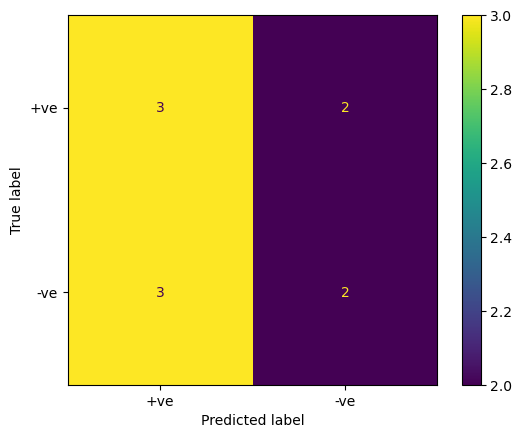

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm,display_labels = df["actual y"].unique()).plot()      #display_labels = ["0","1"]
plt.show()

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y,ypred))

              precision    recall  f1-score   support

         +ve       0.50      0.60      0.55         5
         -ve       0.50      0.40      0.44         5

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.49        10
weighted avg       0.50      0.50      0.49        10



# Logistic Regression

In [8]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

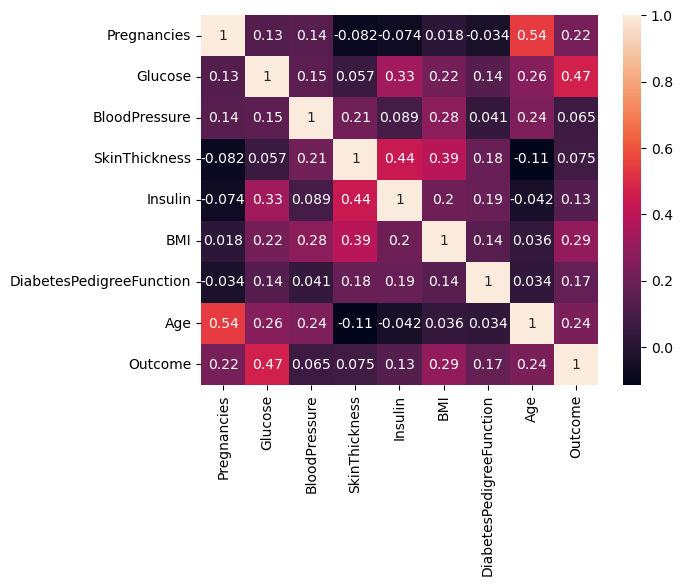

In [13]:
sns.heatmap(df.corr(),annot = True)

#### Data Preprocessing


In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
#no encoding is required

In [16]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

#### Train-test split

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=9)

#### Modelling

In [18]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

#### Prediction and Evaluation

In [19]:
#Prediction

ypred_train = log_model.predict(X_train)
ypred_test = log_model.predict(X_test)

#Evaluation

from sklearn.metrics import accuracy_score
print("Train accuracy :", accuracy_score(y_train,ypred_train))
print("Test accuracy :", accuracy_score(y_test,ypred_test))

#cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_model,X,y,cv=5)
print("Cross Validarion score : ", scores.mean())


Train accuracy : 0.7964169381107492
Test accuracy : 0.7662337662337663
Cross Validarion score :  0.7695696460402341


#### Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test,ypred_test)
cm

array([[85, 15],
       [21, 33]], dtype=int64)

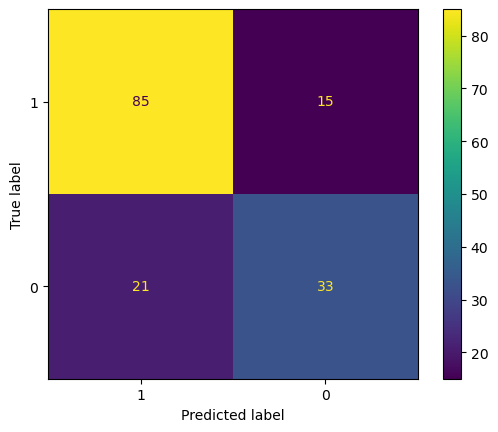

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm,display_labels = df["Outcome"].unique()).plot()      #display_labels = ["0","1"]
plt.show()

#### Classification Report

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       100
           1       0.69      0.61      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



In [23]:
pip install --upgrade scikit-learn


                                              0.0/9.2 MB ? eta -:--:--
                                              0.1/9.2 MB 2.8 MB/s eta 0:00:04
     --                                       0.5/9.2 MB 8.0 MB/s eta 0:00:02
     -----                                    1.2/9.2 MB 11.1 MB/s eta 0:00:01
     ---------                                2.3/9.2 MB 14.3 MB/s eta 0:00:01
     ---------------                          3.5/9.2 MB 15.9 MB/s eta 0:00:01
     ---------------------                    4.9/9.2 MB 19.5 MB/s eta 0:00:01
     -----------------------------            6.7/9.2 MB 22.5 MB/s eta 0:00:01
     ---------------------------------        7.7/9.2 MB 21.4 MB/s eta 0:00:01
     ------------------------------------     8.5/9.2 MB 21.6 MB/s eta 0:00:01
     --------------------------------------   8.8/9.2 MB 20.2 MB/s eta 0:00:01
     ---------------------------------------  9.2/9.2 MB 21.0 MB/s eta 0:00:01
     ---------------------------------------- 9.2/9.2 MB 19.6 

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\rakes\\anaconda3\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



#### ROC and AUC

In [24]:
#from sklearn.metrics import plot_roc_curve
#plot_roc_curve(log_model,X_test,y_test)
#plt.show()

In [25]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Sample standardized dataset
data = {
    "Age": [-1.2247, -0.4082, 0.4082, 1.2247, 2.0408, 2.8571],
    "Income": [-1.2247, -0.4082, 0.4082, -0.8165, 0.0, 1.2247],
    "Class": ["High", "High", "High", "Low", "Low", "Low"]
}

df = pd.DataFrame(data)

# StandardScaler
scaler = StandardScaler()
X = df[["Age", "Income"]]
X_scaled = scaler.fit_transform(X)

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, df["Class"])

# New data point for classification
new_data_point = [[-0.5, -1.01]]
new_data_point_scaled = scaler.transform(new_data_point)

# Predict the class for the new data point
predicted_class = knn.predict(new_data_point_scaled)

print("Predicted Class:", predicted_class[0])


Predicted Class: High


# KNN (K-Nearest Neighbour)

In [26]:
df=pd.read_csv("gene_expression.csv")
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [28]:
df.isnull().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

In [29]:
df.corr()

,Gene One,Gene Two,Cancer Present
Gene One,1.000000,-0.375427,0.545854
Gene Two,-0.375427,1.000000,-0.692352
Cancer Present,0.545854,-0.692352,1.000000


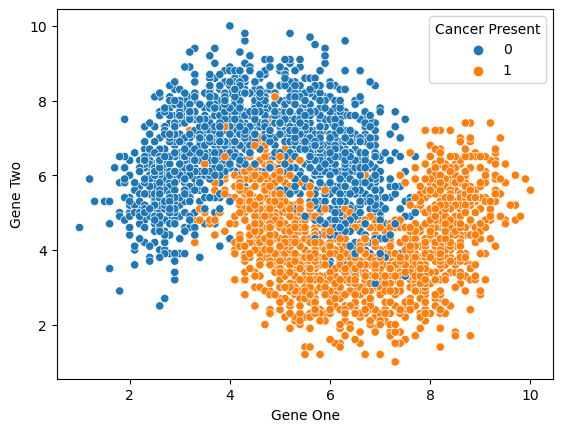

In [30]:
sns.scatterplot(x="Gene One", y="Gene Two", hue="Cancer Present", data=df)
plt.show()

In [31]:
X=df.drop("Cancer Present", axis=1)
y=df["Cancer Present"]

#### Train-Test Split

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=9)

#### Scaling Data

In [33]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

#### Hyperparameter Tuning for KNN Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors' : list(range(1,101))}

from sklearn.model_selection import GridSearchCV
cv_classifier = GridSearchCV(estimator, param_grid, cv=5, scoring="accuracy")
cv_classifier.fit(X_train,y_train)
cv_classifier.best_params_

{'n_neighbors': 19}

#### KNN model with best hyper parameters

In [35]:
#Modelling
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,y_train)

#Prediciton
ypred_train = knn.predict(X_train)
ypred_test = knn.predict(X_test)

#Evaluation
print("Train Accuracy: ", accuracy_score(y_train,ypred_train))
print("Test Accuracy: ", accuracy_score(y_test,ypred_test))

#Cross Validation
from sklearn.model_selection import cross_val_score
print("Cross Validation: ", cross_val_score(knn,X,y,cv=5).mean())

Train Accuracy:  0.9408333333333333
Test Accuracy:  0.9333333333333333
Cross Validation:  0.9313333333333335


#### Confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred_test)
cm

array([[264,  19],
       [ 21, 296]], dtype=int64)

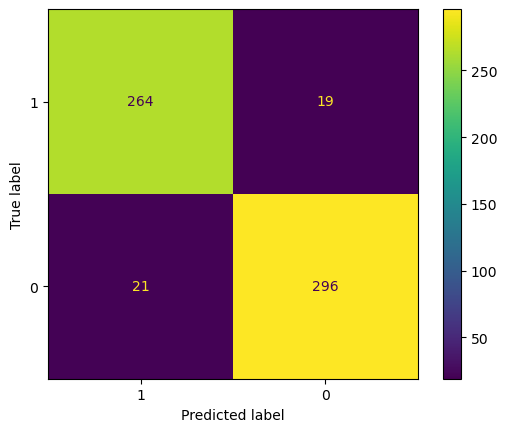

In [37]:

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm,display_labels = df["Cancer Present"].unique()).plot()      #display_labels = ["0","1"]
plt.show()

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       283
           1       0.94      0.93      0.94       317

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600



#### Prediction on New Data

In [39]:
df1 = pd.DataFrame({"Gene One":[4.9],
                   "Gene Two":[3.9]})
df1

,Gene One,Gene Two
0,4.9,3.9


In [40]:
#preprocessing the new data

df1_scaled = scalar.transform(df1)
df1_scaled

array([[-0.37281985, -0.89570232]])

In [41]:
knn.predict(df1_scaled)

array([1], dtype=int64)

# SVM Classification (support vector machines)

In [42]:
df = pd.read_csv("mouse_viral_study.csv")
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [44]:
df.isnull().sum()

Med_1_mL         0
Med_2_mL         0
Virus Present    0
dtype: int64

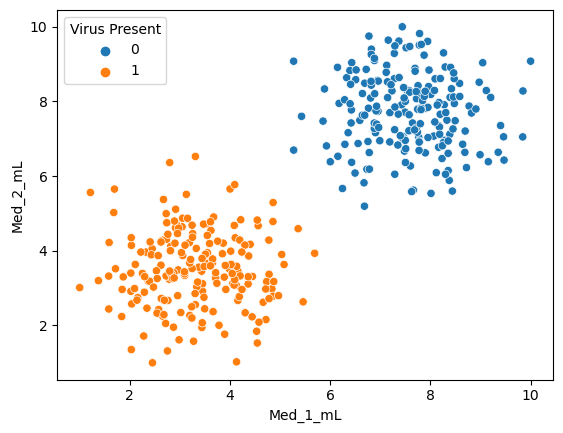

In [45]:
sns.scatterplot(x="Med_1_mL", y="Med_2_mL", hue="Virus Present", data = df)
plt.show()

In [46]:
X=df.drop("Virus Present", axis=1)
y=df["Virus Present"]

#### Train-Test Split

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=9)

#### Support Vector Machines (default parameters)

In [48]:
#Modelling
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

#Prediciton
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

#Evaluation
print("Train Accuracy: ", accuracy_score(y_train,ypred_train))
print("Test Accuracy: ", accuracy_score(y_test,ypred_test))

#Cross Validation
from sklearn.model_selection import cross_val_score
print("Cross Validation: ", cross_val_score(model,X,y,cv=5).mean())

Train Accuracy:  1.0
Test Accuracy:  1.0
Cross Validation:  1.0


#### Hyperparameter Tuning

In [49]:
from sklearn.model_selection import GridSearchCV

estimator = SVC()

param_grid = {"C":[0.01,0,1,1,10,100], "kernel":["linear","rbf","sigmoid","poly"]}

grid = GridSearchCV(estimator,param_grid,cv=5,scoring = "accuracy")

grid.fit(X,y)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0, 1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']},
             scoring='accuracy')

In [50]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

#### Rebuild the SVM  model with best parameters

In [51]:
#Modelling
from sklearn.svm import SVC
model = SVC(C=0.01,kernel="linear")
model.fit(X_train,y_train)

#Prediciton
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

#Evaluation
print("Train Accuracy: ", accuracy_score(y_train,ypred_train))
print("Test Accuracy: ", accuracy_score(y_test,ypred_test))

#Cross Validation
from sklearn.model_selection import cross_val_score
print("Cross Validation: ", cross_val_score(model,X,y,cv=5).mean())

Train Accuracy:  1.0
Test Accuracy:  1.0
Cross Validation:  1.0


#### Prediction on New Data

In [52]:
df1 = pd.DataFrame({"Med_1_mL":[5.8],
                   "Med_2_mL":[6.2]})
df1

,Med_1_mL,Med_2_mL
0,5.8,6.2


In [53]:
model.predict(df1)

array([0], dtype=int64)

# Descision Tree Classification

In [54]:
df = pd.read_csv("penguins_size.csv")
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [56]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [57]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [58]:
df["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [59]:
df["island"].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [60]:
df["sex"].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [61]:
df["sex"].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [62]:
df.describe(include="all")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


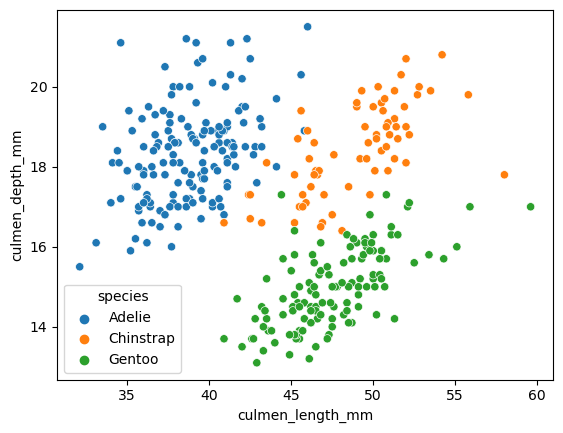

In [63]:
sns.scatterplot(x="culmen_length_mm", y="culmen_depth_mm", hue="species", data=df)
plt.show()

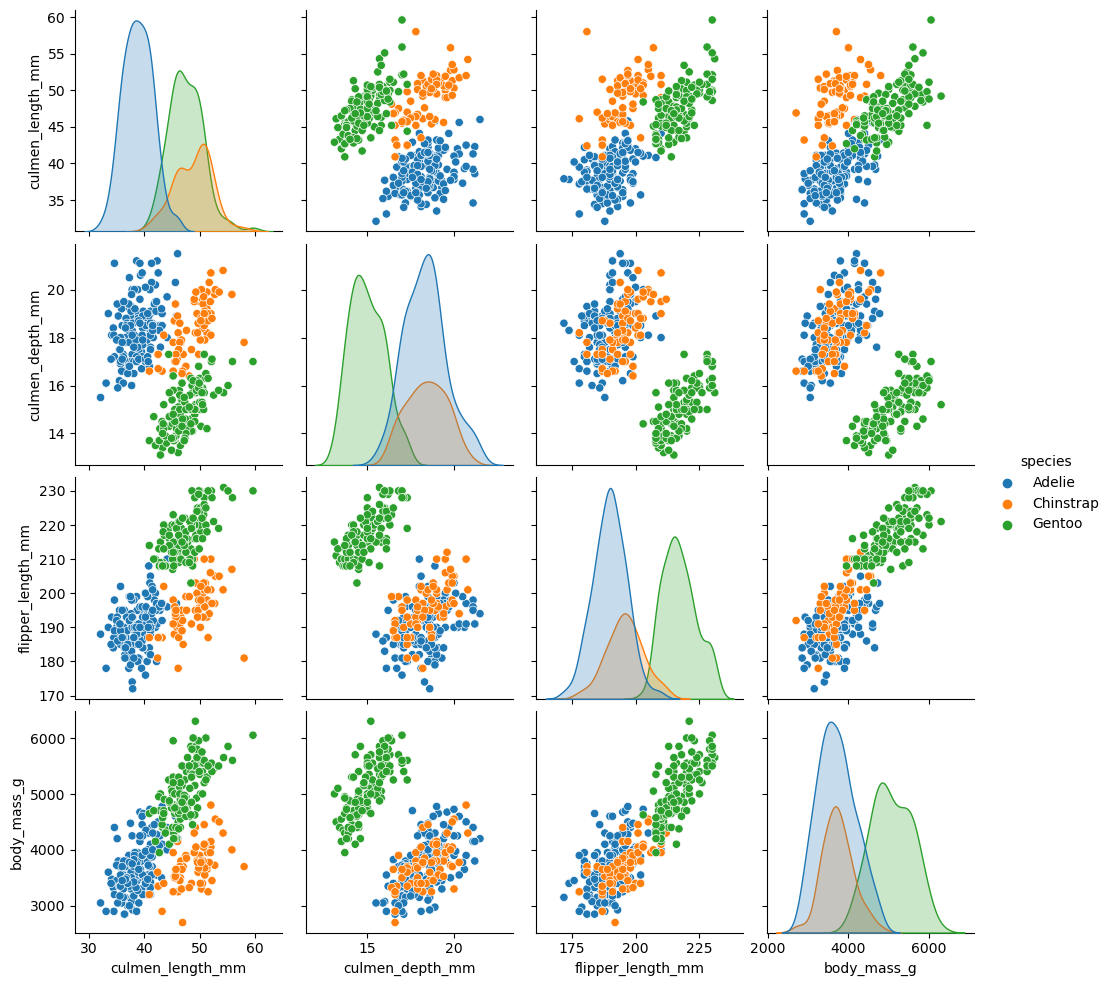

In [64]:
sns.pairplot(df, hue="species")
plt.show()

#### Data Cleaning

In [65]:
df["sex"].replace(".", "MALE", inplace=True)

In [66]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [67]:
df["culmen_length_mm"].fillna(df["culmen_length_mm"].mean(), inplace=True)
df["culmen_depth_mm"].fillna(df["culmen_depth_mm"].mean(), inplace=True)
df["flipper_length_mm"].fillna(df["flipper_length_mm"].mean(), inplace=True)
df["body_mass_g"].fillna(df["body_mass_g"].mean(), inplace=True)
df["sex"].fillna(df["sex"].mode()[0], inplace=True)


#### Encoding

In [68]:
X = pd.get_dummies(df.drop("species",axis=1), drop_first=True)
y = df["species"]

In [69]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.10000,18.70000,181.000000,3750.000000,0,1,1
1,39.50000,17.40000,186.000000,3800.000000,0,1,0
2,40.30000,18.00000,195.000000,3250.000000,0,1,0
3,43.92193,17.15117,200.915205,4201.754386,0,1,1
4,36.70000,19.30000,193.000000,3450.000000,0,1,0
...,...,...,...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386,0,0,1
340,46.80000,14.30000,215.000000,4850.000000,0,0,0
341,50.40000,15.70000,222.000000,5750.000000,0,0,1
342,45.20000,14.80000,212.000000,5200.000000,0,0,0


#### Train-Test Split

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=6)

#### Decision Tree Modelling

In [71]:
#Modelling
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train,y_train)

#Prediction
ypred_train = dt_default.predict(X_train)
ypred_test = dt_default.predict(X_test)

#Evaluation
print("Train Accuracy: ", accuracy_score(y_train,ypred_train))
print("Test Accuracy: ", accuracy_score(y_test,ypred_test))

#Cross Validation
from sklearn.model_selection import cross_val_score
print("Cross Validation: ", cross_val_score(dt_default,X,y,cv=5).mean())

Train Accuracy:  1.0
Test Accuracy:  1.0
Cross Validation:  0.9708439897698211


#### Visualize the Tree

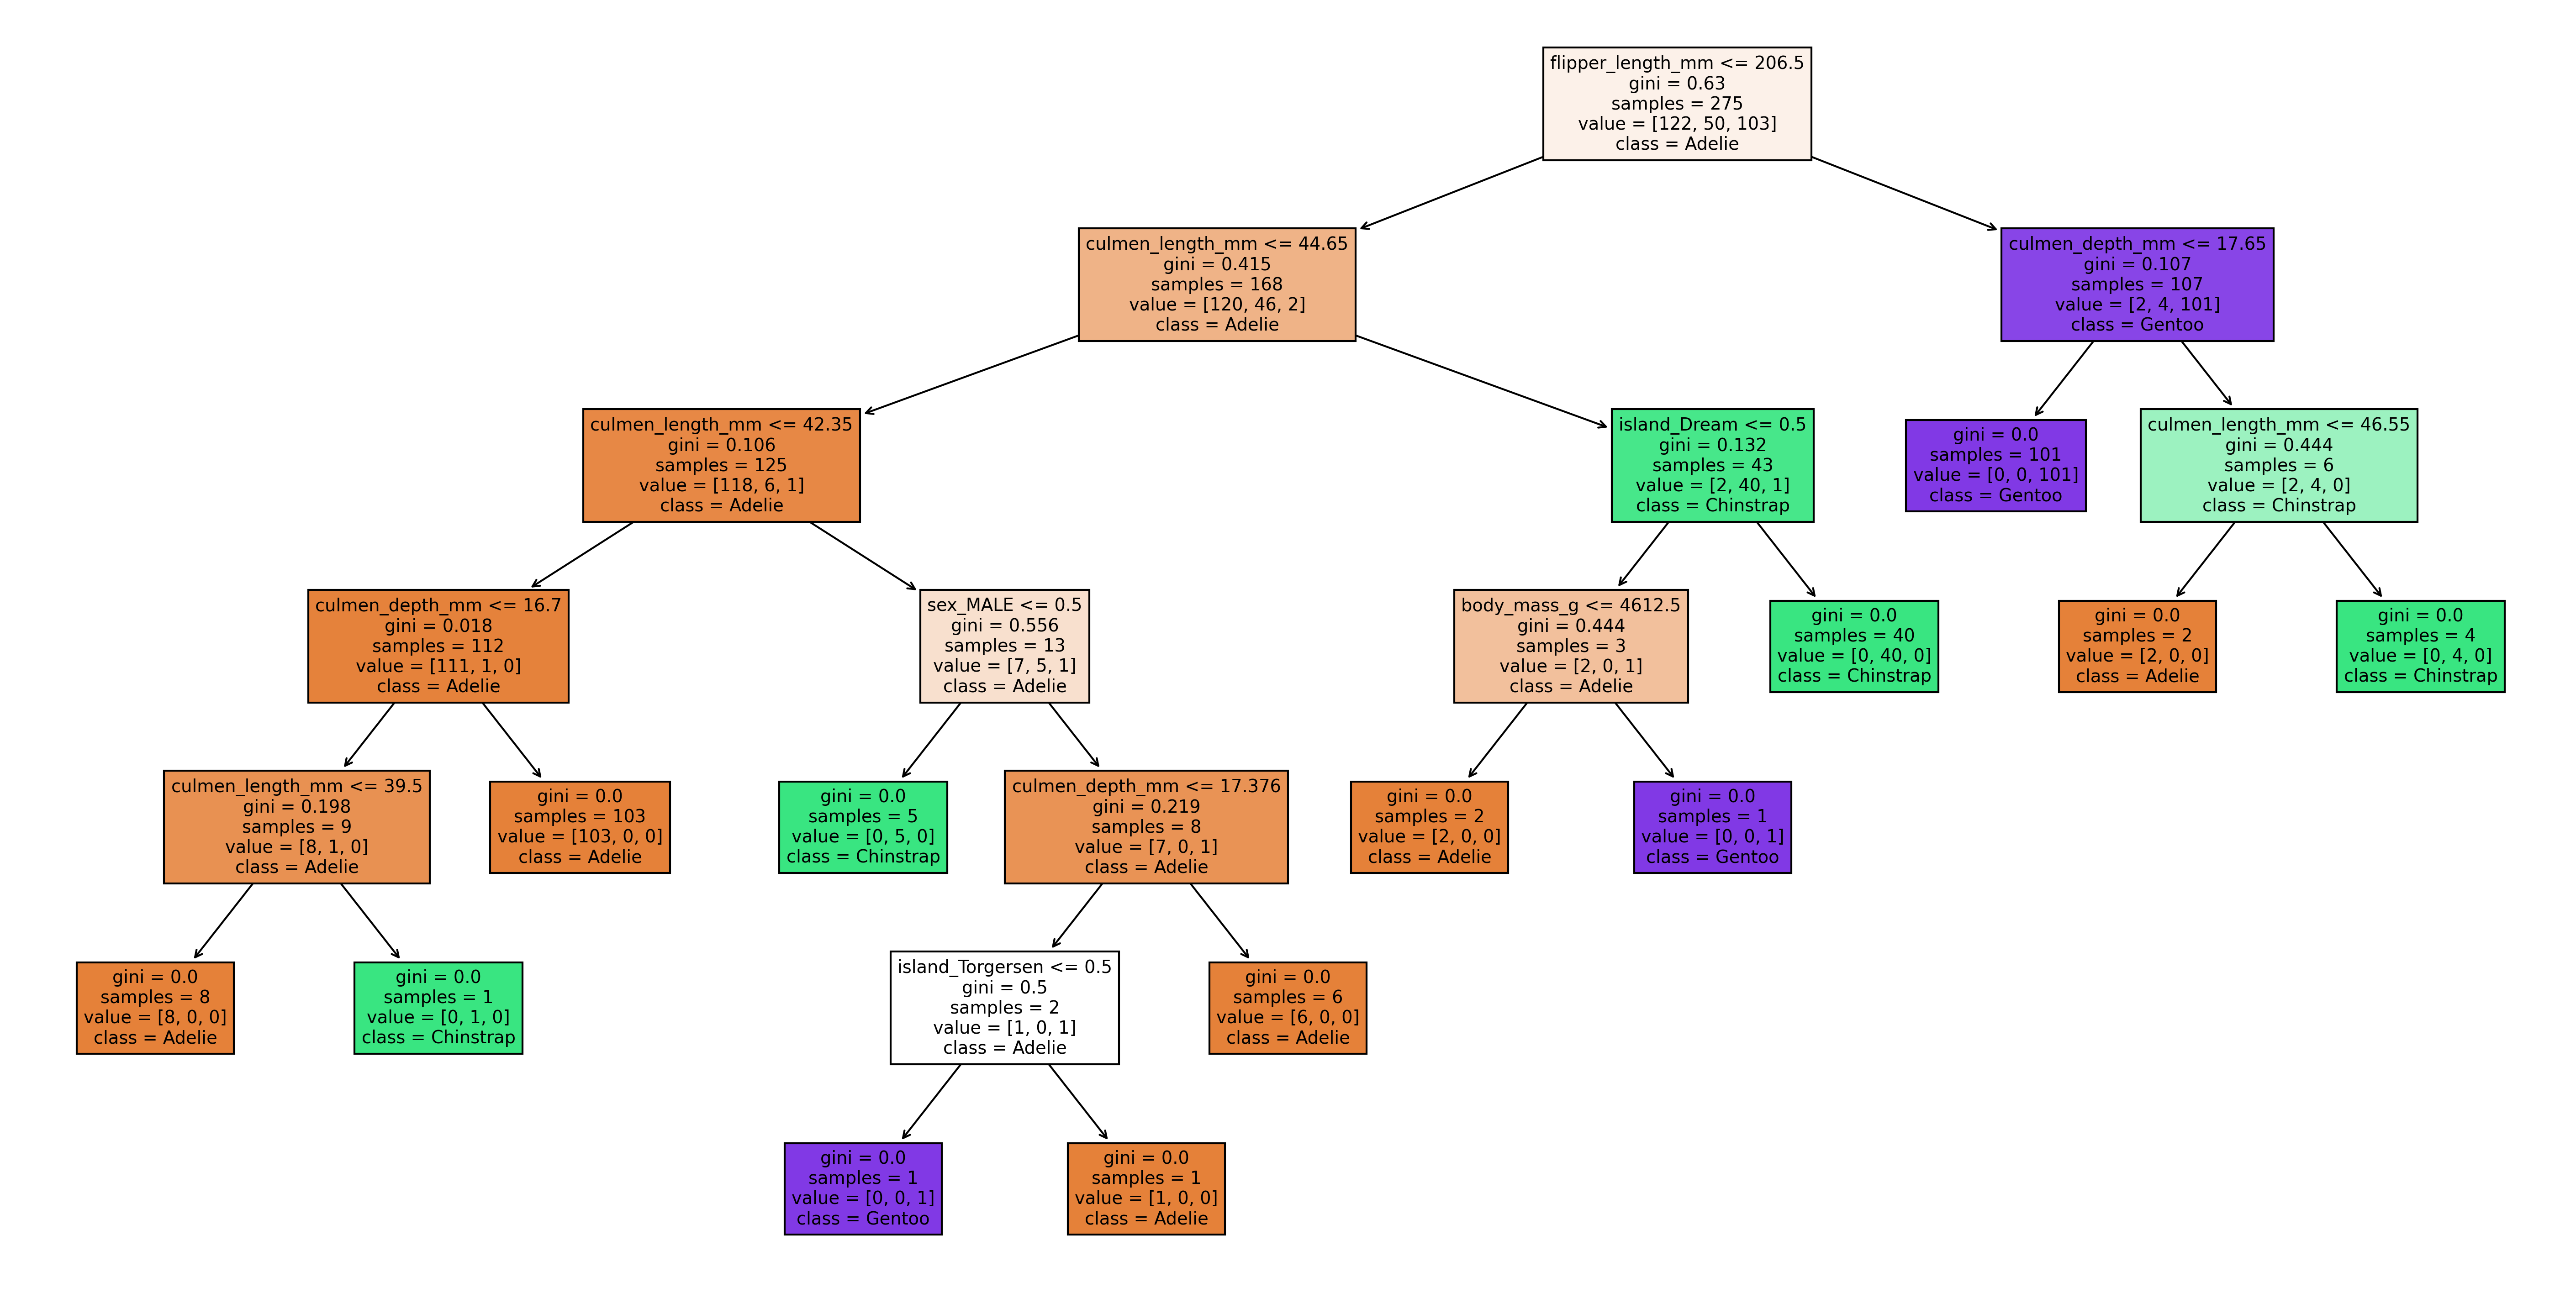

In [72]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,12), dpi=300,)

plot_tree(dt_default,
          filled=True,
          feature_names=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
         class_names=['Adelie', 'Chinstrap', 'Gentoo'])
plt.show()

#### HyperParameter Tuning

In [73]:
from sklearn.model_selection import GridSearchCV

#model
estimator = DecisionTreeClassifier(random_state=0)

#parameters (which you want to tune and identify the best)
param_grid = {'criterion': ["gini", "entropy"],
              'max_depth': [1,2,3,4,5,6]}

grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)

grid.fit(X_train, y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

#### Importance of each feature given by this model

In [74]:
grid.best_estimator_.feature_importances_

array([0.34390987, 0.05670105, 0.5346114 , 0.00774261, 0.02520849,
       0.        , 0.03182658])

In [75]:
feats = pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                     index=X.columns,
                     columns=['Feature Importance'])

feats_imp = feats[feats['Feature Importance']>0]

important_features_list = feats_imp.index.to_list()

#### Final DecisionTree Model (with best hyper parameters & with important features)

In [76]:
X_imp = X[important_features_list]

#train-test split
X_train,X_test,y_train,y_test = train_test_split(X_imp ,y,test_size=0.2,random_state=6)

#modelling with best hyper parameters
final_dt_model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=0)
final_dt_model.fit(X_train,y_train)

#Prediction
ypred_train = final_dt_model.predict(X_train)
ypred_test = final_dt_model.predict(X_test)

#Evaluation
print("Train Accuracy: ", accuracy_score(y_train,ypred_train))
print("Test Accuracy: ", accuracy_score(y_test,ypred_test))

#Cross Validation
from sklearn.model_selection import cross_val_score
print("Cross Validation: ", cross_val_score(final_dt_model,X,y,cv=5).mean())

Train Accuracy:  0.9963636363636363
Test Accuracy:  1.0
Cross Validation:  0.9737425404944586


In [77]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,ypred_test)

array([[30,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 21]], dtype=int64)

# Random Forest Classification

In [78]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,MALE
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [80]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [81]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.10000,18.70000,181.000000,3750.000000,0,1,1
1,39.50000,17.40000,186.000000,3800.000000,0,1,0
2,40.30000,18.00000,195.000000,3250.000000,0,1,0
3,43.92193,17.15117,200.915205,4201.754386,0,1,1
4,36.70000,19.30000,193.000000,3450.000000,0,1,0
...,...,...,...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386,0,0,1
340,46.80000,14.30000,215.000000,4850.000000,0,0,0
341,50.40000,15.70000,222.000000,5750.000000,0,0,1
342,45.20000,14.80000,212.000000,5200.000000,0,0,0


In [82]:
y

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [83]:
#Train-Test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=6)

#### Modelling & Evaluation

In [84]:
# Random Forest Classfier with default parameters

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=5)
model.fit(X_train,y_train)

#Prediction
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

#Evaluation
from sklearn.metrics import accuracy_score
print("Train accuracy: ", accuracy_score(ypred_train,y_train))
print("Test accuracy: ", accuracy_score(ypred_test,y_test))

from sklearn.model_selection import cross_val_score
print("Cross Validation: ", cross_val_score(model,X,y,cv=5).mean())

Train accuracy:  1.0
Test accuracy:  1.0
Cross Validation:  0.9854646206308612


#### HyperParameter Tuning

In [85]:
from sklearn.model_selection import GridSearchCV

#model
estimator = RandomForestClassifier(random_state=0)

#parameters (which you want to tune and identify the best)
param_grid = {'n_estimators': list(range(1,101))}

grid = GridSearchCV(estimator, param_grid, scoring="accuracy", cv=5)

grid.fit(X_train, y_train)

grid.best_params_

{'n_estimators': 12}

#### Importance of each feature given by this model

In [86]:
grid.best_estimator_.feature_importances_

array([0.35706512, 0.16032298, 0.22653459, 0.0667992 , 0.15122477,
       0.02600539, 0.01204796])

In [87]:
feats_imp = pd.DataFrame(data = grid.best_estimator_.feature_importances_,
                         index = X.columns,
                         columns = ["Feature Importance"])
feats_imp

,Feature Importance
culmen_length_mm,0.357065
culmen_depth_mm,0.160323
flipper_length_mm,0.226535
body_mass_g,0.066799
island_Dream,0.151225
island_Torgersen,0.026005
sex_MALE,0.012048


In [88]:
important_feats = feats[feats["Feature Importance"]>0]
important_feats_list = important_feats.index.to_list()
important_feats_list

['culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'island_Dream',
 'sex_MALE']

#### Final Random Forest Model

In [89]:
# Random Forest Classfier after hyperparameter tuning
X_imp = X[important_feats_list]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size=0.2,random_state=6)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=12,random_state=0)
model.fit(X_train,y_train)

#Prediction
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

#Evaluation
from sklearn.metrics import accuracy_score
print("Train accuracy: ", accuracy_score(ypred_train,y_train))
print("Test accuracy: ", accuracy_score(ypred_test,y_test))

from sklearn.model_selection import cross_val_score
print("Cross Validation: ", cross_val_score(model,X,y,cv=5).mean())

Train accuracy:  0.9927272727272727
Test accuracy:  1.0
Cross Validation:  0.9854646206308612


# Boosting 

In [90]:
df = pd.read_csv("mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [92]:
df["class"].unique()

array(['p', 'e'], dtype=object)

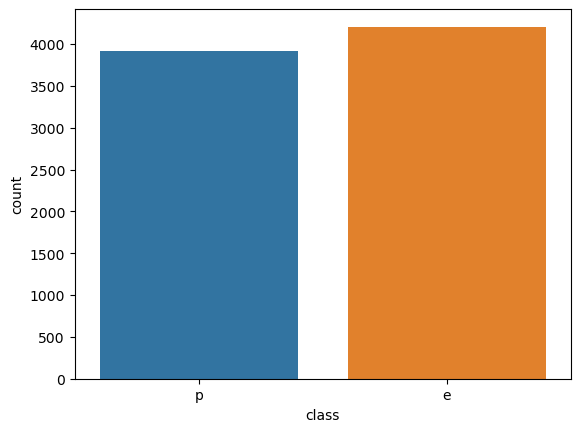

In [93]:
sns.countplot(data=df,x="class")
plt.show()

In [94]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [95]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [96]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [97]:
X = pd.get_dummies(df.drop("class",axis=1),drop_first=True)
y = df["class"]

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Adaptive Boosting

#### Identifying best parameters for AdaBoost model using Hyperparameter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV

#model/estimator
from sklearn.ensemble import AdaBoostClassifier
estimator_ab = AdaBoostClassifier()

#parameters grid
param_grid_ab = {"n_estimators": list(range(1,51))}

#grid search
grid_ab = GridSearchCV(estimator_ab, param_grid_ab, cv=5, scoring="accuracy")
grid_ab.fit(X_train, y_train)

# best paramters for AdaBoost Model
grid_ab.best_params_

{'n_estimators': 20}

#### Ada Boost Model important features

In [101]:
feats_ab = pd.DataFrame(data=grid_ab.best_estimator_.feature_importances_,
                        index=X.columns,
                        columns=["Feature_Importance"])

important_features_ab = feats_ab[feats_ab["Feature_Importance"]>0]
imp_features_list_ab = important_features_ab.index.to_list()

#### AdaBoost Classifier with its important features & best hyperparameters

In [104]:
X_imp = X[imp_features_list_ab]           #dropped unimportant

X_train_ab, X_test_ab, y_train_ab, y_test_ab = train_test_split(X_imp,y,test_size=0.2,random_state=101)

#modelling
ada = AdaBoostClassifier(n_estimators=20)
ada.fit(X_train_ab,y_train_ab)

#evaluation
ypred_train_ab = ada.predict(X_train_ab)

from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train_ab,ypred_train_ab))

#Cross Validation
from sklearn.model_selection import cross_val_score
print("Cross Validation Score: ", cross_val_score(ada, X_train_ab, y_train_ab, cv=5).mean())

#Evaluation of Test data
ypred_test_ab = ada.predict(X_test_ab)
print("Test Accuracy: ", accuracy_score(y_test_ab,ypred_test_ab))

Train Accuracy:  1.0
Cross Validation Score:  1.0
Test Accuracy:  1.0


## Gradient Boosting

In [105]:
X = pd.get_dummies(df.drop("class",axis=1),drop_first=True)
y = pd.get_dummies(df["class"], drop_first=True)

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#### Identifying best parameters for Gradient Boost model using Hyperparameter Tuning

In [111]:
from sklearn.model_selection import GridSearchCV

#model/estimator
from sklearn.ensemble import GradientBoostingClassifier
estimator_gb = GradientBoostingClassifier()

#parameters grid
param_grid_gb = {"n_estimators": [1,5,10,20],
                 "learning_rate": [0.1,0.2,0.3,0.5,0.8,1]}

#grid search
grid_gb = GridSearchCV(estimator_gb, param_grid_gb, cv=5, scoring="accuracy")
grid_gb.fit(X_train, y_train)

# best paramters for AdaBoost Model
grid_gb.best_params_

{'learning_rate': 0.8, 'n_estimators': 10}

#### Ada Boost Model important features

In [119]:
feats_gb = pd.DataFrame(data=grid_gb.best_estimator_.feature_importances_,
                        index=X.columns,
                        columns=["Feature_Importance"])

important_features_gb = feats_gb[feats_gb["Feature_Importance"]>0]
imp_features_list_gb = important_features_gb.index.to_list()

#### Gradient Boost Classifier with its important features & best hyperparameters

In [120]:
X_imp = X[imp_features_list_gb]           #dropped unimportant

X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X_imp,y,test_size=0.2,random_state=101)

#modelling
gb = GradientBoostingClassifier(n_estimators=20)
gb.fit(X_train_gb,y_train_gb)

#evaluation
ypred_train_gb = gb.predict(X_train_gb)

from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train_gb,ypred_train_gb))

#Cross Validation
from sklearn.model_selection import cross_val_score
print("Cross Validation Score: ", cross_val_score(gb, X_train_gb, y_train_gb, cv=5).mean())

#Evaluation of Test data
ypred_test_gb = gb.predict(X_test_gb)
print("Test Accuracy: ", accuracy_score(y_test_gb,ypred_test_gb))

Train Accuracy:  0.9959993845206955
Cross Validation Score:  0.9929217741457925
Test Accuracy:  0.9963076923076923


#### Identifying best parameters for Xtreme Gradient Boost (XGB) model using Hyperparameter Tuning

In [117]:
pip install xgboost

                                              0.0/99.7 MB ? eta -:--:--
                                              0.2/99.7 MB 3.9 MB/s eta 0:00:26
                                              1.0/99.7 MB 10.0 MB/s eta 0:00:10
                                              2.0/99.7 MB 15.6 MB/s eta 0:00:07
     -                                        2.8/99.7 MB 16.3 MB/s eta 0:00:06
     --                                       5.3/99.7 MB 24.0 MB/s eta 0:00:04
     --                                       6.2/99.7 MB 23.2 MB/s eta 0:00:05
     --                                       7.1/99.7 MB 22.8 MB/s eta 0:00:05
     --                                       7.2/99.7 MB 21.9 MB/s eta 0:00:05
     --                                       7.2/99.7 MB 21.9 MB/s eta 0:00:05
     ---                                      8.1/99.7 MB 17.9 MB/s eta 0:00:06
     ---                                      8.9/99.7 MB 17.8 MB/s eta 0:00:06
     ---                                      9.7

In [118]:
from sklearn.model_selection import GridSearchCV

#model/estimator
from xgboost import XGBClassifier
estimator_xgb = XGBClassifier()

#parameters grid
param_grid_xgb = {"n_estimators": [1,5,10,20],
                  "max_depth": [3,4,5],
                  "gamma": [0,0.15,0.3,0.5,1]}

#grid search
grid_xgb = GridSearchCV(estimator_xgb, param_grid_xgb, cv=5, scoring="accuracy")
grid_xgb.fit(X_train, y_train)

# best paramters for AdaBoost Model
grid_xgb.best_params_

{'gamma': 0, 'max_depth': 5, 'n_estimators': 20}

#### XGBoost Model important features

In [121]:
feats_xgb = pd.DataFrame(data=grid_xgb.best_estimator_.feature_importances_,
                        index=X.columns,
                        columns=["Feature_Importance"])

important_features_xgb = feats_xgb[feats_xgb["Feature_Importance"]>0]
imp_features_list_xgb = important_features_xgb.index.to_list()

#### XGBoost Classifier with its important features & best hyperparameters

In [123]:
X_imp = X[imp_features_list_xgb]           #dropped unimportant

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_imp,y,test_size=0.2,random_state=101)

#modelling
xgb = GradientBoostingClassifier(n_estimators=20)
xgb.fit(X_train_xgb,y_train_xgb)

#evaluation
ypred_train_xgb = xgb.predict(X_train_xgb)

from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train_xgb,ypred_train_xgb))

#Cross Validation
from sklearn.model_selection import cross_val_score
print("Cross Validation Score: ", cross_val_score(xgb, X_train_xgb, y_train_xgb, cv=5).mean())

#Evaluation of Test data
ypred_test_xgb = xgb.predict(X_test_xgb)
print("Test Accuracy: ", accuracy_score(y_test_xgb,ypred_test_xgb))

Train Accuracy:  0.9959993845206955
Cross Validation Score:  0.9926140818381004
Test Accuracy:  0.9963076923076923


## Final Model  

In [124]:
ada = AdaBoostClassifier(n_estimators=20)